## Neighborhood Capstone Project 

### Toronto Canada

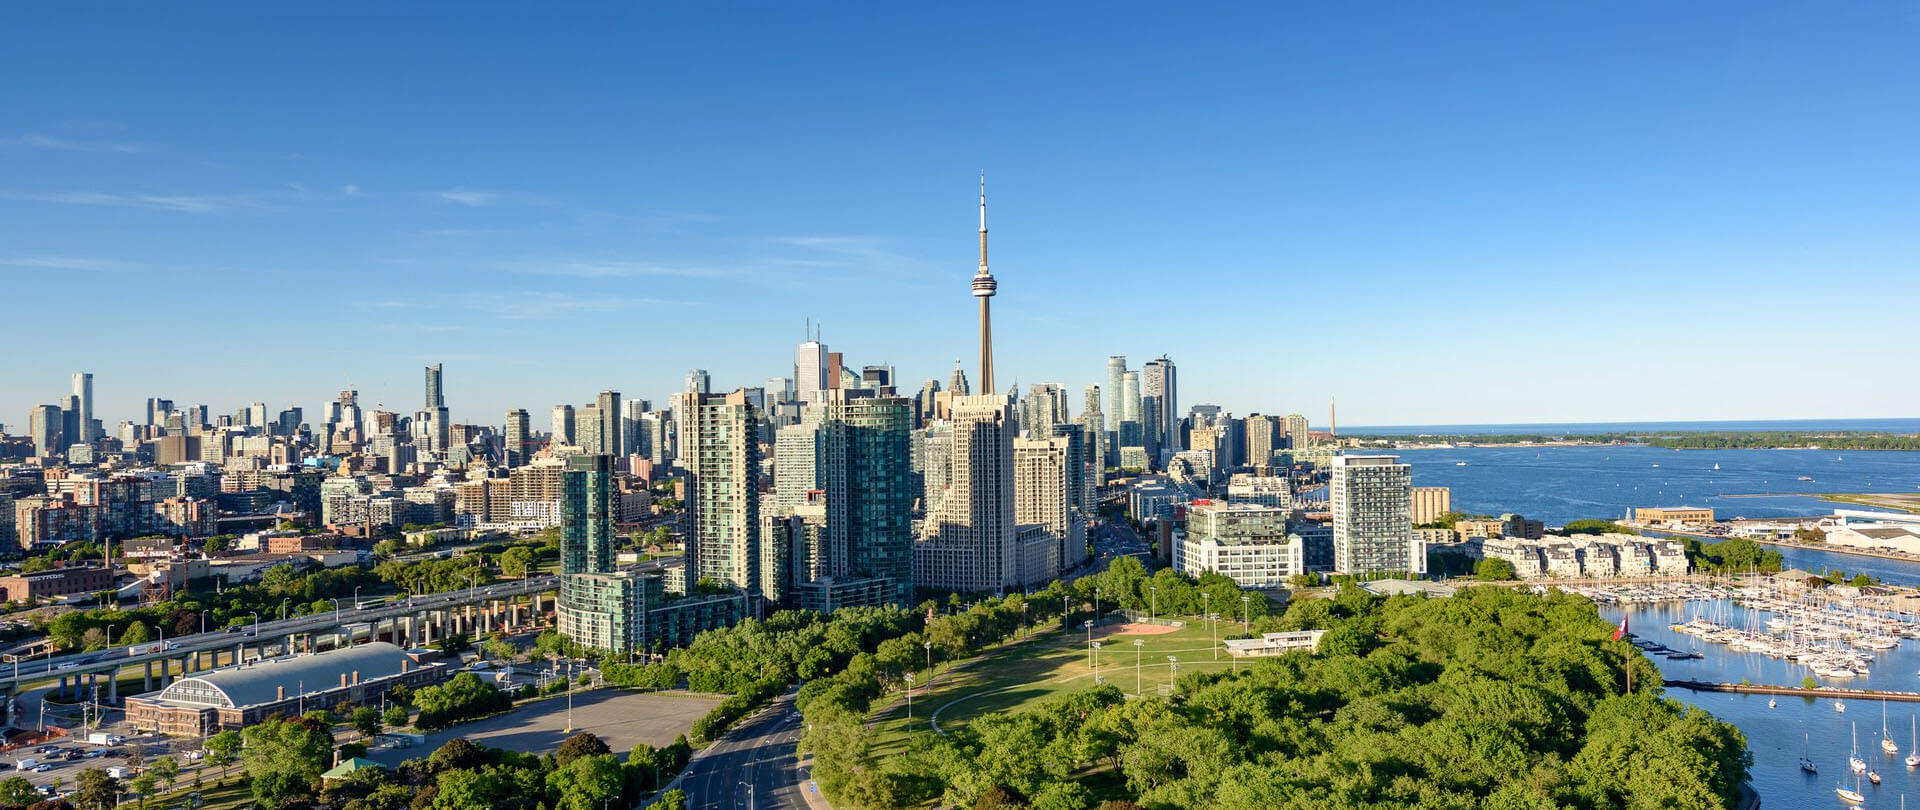


### Project Description:
Whenever people move to any other place, they explore the place and try to fetch as much information as possible about it. It can be the neighborhood, locality, market, price of the place and many more factors including neighborhood analysis. This is can be termed as request for a search algorithm which usually returns the requested features such as population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities etc.

It would be beneficial and nice to have an application which could make easy by considering a comparative analysis between the neighborhood with provided factors.

This project helps the end user or the stakeholder to achieve the results which will not only recommend but also saves a lot of time in manual search. This will indeed save the time and money of the user.

This project can be used by the user at the time of rental apartment or buy house in a locality based on the distribution of various facilities available around the neighborhood. As an example, this project would compare 2 randomly picked neighborhoods and analyses the top 10 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. Also, this project uses K-mean clustering unsupervised machine learning algorithm to cluster the venues based on the place category such as restaurants, park, coffee shop, gym, clubs etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other, feel free to change the neighbourhood in the given cell or even you can add more neighbourhood for the comparison purpose

### About Toronto

Toronto, the capital of the province of Ontario, is a major Canadian city along Lake Ontario’s northwestern shore. It's a dynamic metropolis with a core of soaring skyscrapers, all dwarfed by the iconic, free-standing CN Tower. Toronto also has many green spaces, from the orderly oval of Queen’s Park to 400-acre High Park and its trails, sports facilities and zoo, cherry bolossom season from mid April to end of the month its amazing experience where you can have look trees with full blossom cherry flowers however when spring start till the fall season there are different colors of nature to experience


### Data and APIs:
**Foursquare API**:
This API has a database of more than 105 million places. This project would use Four-square API as its prime data gathering source. Many organizations are using to geo-tag their photos with detailed info about a destination, while also serving up contextually relevant locations for those who are searching for a place to eat, drink or explore. This API provides the ability to perform location search, location sharing and details about a business. Foursquare users can also use photos, tips and reviews in many productive ways to add value to the results.

Collecting data from : https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=995657573

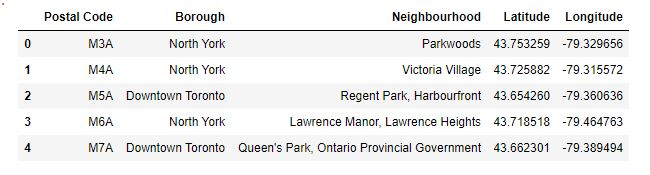


#### API Request
HTTP requests would be made to this Foursquare API server using zip codes of the Toronto city neighborhoods to pull the location information. Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 1500

**Folium- Python visualization library** would be used to visualize the neighborhoods cluster distribution of Toronto city over an interactive leaflet map. Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

**Unsupervised machine learning algorithm K-mean clustering** would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

#### Python packages and Dependencies:

- Pandas - Library for Data Analysis
- NumPy – Library to handle data in a vectorized manner
- JSON – Library to handle JSON files
- Geopy – To retrieve Location Data
- Requests – Library to handle http requests
- Matplotlib – Python Plotting Module
- Sklearn – Python machine learning Library
- Folium – Map rendering Library
- BeautifulSoup - Reading data from link

### Implementation 

In [14]:
!pip install lxml
import requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from bs4 import BeautifulSoup
import json # library to handle JSON files
#import json, lxml

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes #uncomment this line if you haven't completed the Foursquare API lab

import folium  # map rendering library

print('Libraries imported.')

Libraries imported.


#### Reading the data from wikipedia link with Soup library 

In [15]:
source = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=995657573').text
soup=BeautifulSoup(source,'lxml') # reading wiki file 
print(soup.title) # table title
from IPython.display import display_html
tab = str(soup.table) # printing tabl's string along
display_html(tab,raw=True) # displaying html data into table in raw file

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


**Reading data into pandas data frame**

In [16]:
neighbourhood_data = pd.read_html(tab) 

neighbourhood = neighbourhood_data[0]
neighbourhood.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [17]:
neigh_data=neighbourhood[neighbourhood.Borough != 'Not assigned'] # removing 'Not assigned' value with exclaimation mark from Borough assigning data to neigh_data

neigh_data2 = neigh_data.groupby(['Postal Code', 'Borough'], sort=False).agg(','.join) # rejoining Borough with postal code after after cleaning 
neigh_data2.reset_index(inplace=True) # reset index after cleaning

neigh_data2['Neighbourhood']=np.where(neigh_data2['Neighbourhood']== 'Not assigned', neigh_data['Borough'], neigh_data2['Neighbourhood'])
# removing 'Not assigned' value form the rows of Neighbourhood and Borough  with 'np.where' 

neigh_data2.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


**Getting coordinates(lat,lng) from Geospatial data**

In [18]:
lat_lng = pd.read_csv('https://cocl.us/Geospatial_data') 
lat_lng.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### `Joining the (lat-lng) with the postal codes`

In [19]:
neighborhoods = pd.merge(neigh_data2,lat_lng)
neighborhoods.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [20]:
neighborhood_data = neighborhoods
neighborhood_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### Toronto Neighbourhood with Folium map

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map

In [21]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [22]:
# creating map of Toronto using latitude and longitude values with zoom start 10
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map of Toronto
for lat, lng, borough, neighborhood_data in zip(neighborhood_data['Latitude'], neighborhood_data['Longitude'], neighborhood_data['Borough'], neighborhood_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood_data, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [23]:
neighborhoods.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### Keeping Neighbourhood with contain Downtown Toronto

In [24]:
downtown_data=neighborhoods[neighborhoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [25]:
    address = 'Downtown Toronto, ON'

    geolocator= Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [26]:
# creating map of Downtown Toronto using latitude and longitude values
map_Downtown_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown_Toronto)  
    
map_Downtown_Toronto

In [29]:
downtown_data.loc[1,'Neighbourhood']

"Queen's Park, Ontario Provincial Government"

In [30]:
neighborhood_latitude = downtown_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_data.loc[1, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Queen's Park, Ontario Provincial Government are 43.6623015, -79.3894938.


### FourSquare API
Search and collect all the popular Venues in Chicago Neighborhoods Radius-1500 Limit-100

In [31]:


LIMIT = 100
radius = 1500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                      CLIENT_SECRET,
                                                                                                                      VERSION,
                                                                                                                      neighborhood_latitude,
                                                                                                                      neighborhood_longitude,
                                                                                                                      radius,
                                                                                                                      LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=K3P4255BUJLI5ZO0SEU55KMHIUC5UHM41HRT1HKWXWF3D1M3&client_secret=Z5AG4AVVW1S5XJKDMY3J25YNR4BLO1G2MIKJD0LSC2MCC4P0&v=20180604&ll=43.6623015,-79.3894938&radius=1500&limit=100'

In [32]:
results = requests.get(url).json() # reguest responses
results

{'meta': {'code': 200, 'requestId': '6099befe30ee16366026ac3f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 43.67580151350001,
    'lng': -79.37086730599856},
   'sw': {'lat': 43.648801486499984, 'lng': -79.40812029400144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d206bf964a520e69136e3',
       'name': "Queen's Park",
       'location': {'address': 'University Ave.',
        'crossStreet': 'at Wellesley Ave.',
        'lat': 43.66394609897775,
        'lng': -79.39217952520835,
       

### `Getting categories of the venues`

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
venues = results['response']['groups'][0] ['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-34-14f67fa49911>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830
2,The Alley,Bubble Tea Shop,43.665922,-79.385567
3,Hailed Coffee,Coffee Shop,43.658833,-79.383684
4,Jimmy's Coffee,Coffee Shop,43.658421,-79.385613


In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### `Reguesting nearby venues Downtown Toronto`

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
Toronto_venues = getNearbyVenues(names=downtown_data['Neighbourhood'],
                                  latitudes=downtown_data['Latitude'],
                                  longitudes=downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [38]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1869, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
4,"Regent Park, Harbourfront",43.65426,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market


#### `Grouping neighbourhood venues wise`

In [39]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",69,69,69,69,69,69
Central Bay Street,100,100,100,100,100,100
Christie,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


### `One Hot Encoding`

In [40]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Organic Grocery,Other Great Outdoors,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Track,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,

In [41]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped.head()

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Organic Grocery,Other Great Outdoors,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Track,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.02,0.0,0.01,0.0,0.010000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.01,0.000000,0.010000,0.01,0.01,0.01,0.0,0.01,0.000000,0.00,0.00,0.0,0.00,0.010000,0.00,0.00,0.0,0.00,0.0,0.070000,0.000000,0.00,0.00,0.01,0.0,0.0,0.01,0.01,0.100000,0.00,0.0,0.00,0.02,0.02,0.01,0.0,0.00,0.0,0.010000,0.01,0.00,0.010000,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.00,0.00,0.0,0.03,0.000000,0.0,0.0,0.0,0.0,0.01,0.00,0.01,0.0,0.000000,0.01,0.00,0.0,0.00,0.00,0.01,0.01,0.010000,0.01,0.000000,0.00,0.00,0.010000,0.00,0.050000,0.0,0.01,0.00,0.000000,0.00,0.02,0.02,0.0,0.00,0.00,0.00,0.01,0.000000,0.02,0.0,0.000000,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.000000,0.02,0.00,0.0,0.000000,0.00,0.0,0.050000,0.00,0.010000,0.0,0.0,0.01,0.0,0.010000,0.00,0.03,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.030000,0.0,0.01,0.01,0.00,0.00,0.010000,0.000000,0.030000,0.00,0.010000,0.0,0.00,0.00,0.0,0.01,0.01,0.01,0.0,0.01,0.000000,0.00,0.0,0.0,0.00,0.02,0.010000,0.00,0.000000,0.000000,0.01,0.0,0.02,0.0,0.00,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.014493,0.014493,0.00,0.0,0.00,0.0,0.014493,0.0,0.00,0.0,0.014493,0.014493,0.0,0.00,0.014493,0.014493,0.00,0.00,0.00,0.0,0.00,0.028986,0.00,0.00,0.0,0.00,0.028986,0.00,0.00,0.0,0.00,0.0,0.086957,0.014493,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.072464,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.014493,0.00,0.00,0.014493,0.00,0.00,0.0,0.014493,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.014493,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.014493,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.057971,0.00,0.043478,0.00,0.00,0.01

In [42]:
num_top_venues = 10
for hood in Toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                 venue  freq
0          Coffee Shop  0.10
1                 Café  0.07
2                 Park  0.05
3                Hotel  0.05
4   Seafood Restaurant  0.03
5           Restaurant  0.03
6       Farmers Market  0.03
7                Plaza  0.03
8  Japanese Restaurant  0.02
9   Italian Restaurant  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0              Park  0.12
1              Café  0.09
2       Coffee Shop  0.07
3               Gym  0.06
4   Harbor / Marina  0.04
5             Hotel  0.03
6       Pizza Place  0.03
7           Brewery  0.03
8    Scenic Lookout  0.03
9  Sushi Restaurant  0.03


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.06
2                 Park  0.05
3           Restaurant  0.04
4  Japanese Restaurant  0.03
5          Pizza Place  0.03
6          Yoga Studio  0.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Café,Park,Hotel,Plaza,Seafood Restaurant,Farmers Market,Restaurant,Concert Hall,Thai Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Park,Café,Coffee Shop,Gym,Harbor / Marina,Hotel,Sushi Restaurant,Brewery,Boat or Ferry,Track
2,Central Bay Street,Café,Coffee Shop,Park,Restaurant,Pizza Place,Japanese Restaurant,Mexican Restaurant,Plaza,Ramen Restaurant,Hotel
3,Christie,Café,Coffee Shop,Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Park,Grocery Store,Mexican Restaurant,Cocktail Bar
4,Church and Wellesley,Coffee Shop,Park,Café,Japanese Restaurant,Gastropub,Hotel,Indian Restaurant,Pizza Place,Diner,Dance Studio
5,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Park,Plaza,Restaurant,Hotel,Yoga Studio,Farmers Market,Vegetarian / Vegan Restaurant,Neighborhood
6,"First Canadian Place, Underground city",Coffee Shop,Café,Park,Plaza,Sandwich Place,Hotel,Pizza Place,Restaurant,Yoga Studio,Neighborhood
7,"Garden District, Ryerson",Coffee Shop,Gastropub,Café,Japanese Restaurant,Theater,Cosmetics Shop,Restaurant,Gym,Hotel,Pizza Place
8,"Harbourfront East, Union Station, Toronto Islands",Café,Coffee Shop,Hotel,Park,Japanese Restaurant,Gym,Theater,Scenic Lookout,Baseball Stadium,Deli / Bodega
9,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Bar,Yoga Studio,Vegetarian / Vegan Restaurant,Dessert Shop,Bakery,Cocktail Bar,Pizza Place,Sandwich Place


In [45]:
# set number of clusters
kclusters = 10

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 3, 1, 7, 8, 0, 0, 5, 4, 2])

In [46]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Elbow Curve to find the optimum number of clusters

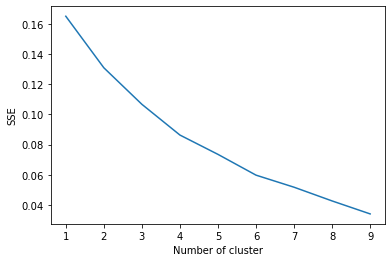

In [47]:
Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Toronto_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [48]:

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as n

## Silhouette Scores and Cluster Visualizations

For 2  Clusters  the average silhouette_score is : 0.2454889208515766
For 3  Clusters  the average silhouette_score is : 0.1921975317136928
For 4  Clusters  the average silhouette_score is : 0.20588637007137914
For 5  Clusters  the average silhouette_score is : 0.20897197371001347


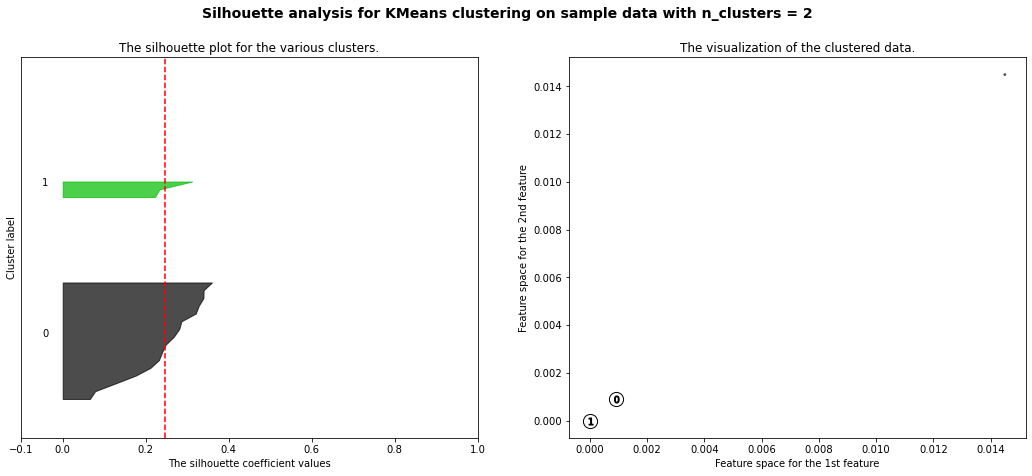

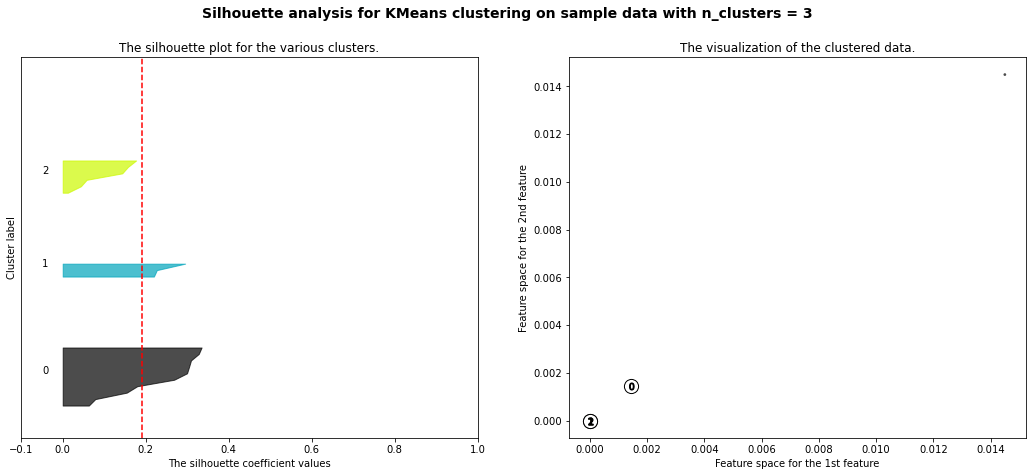

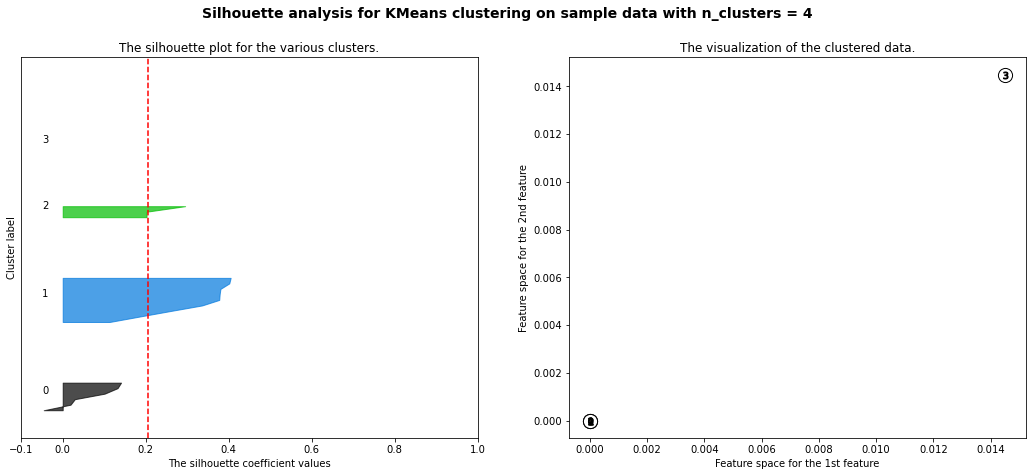

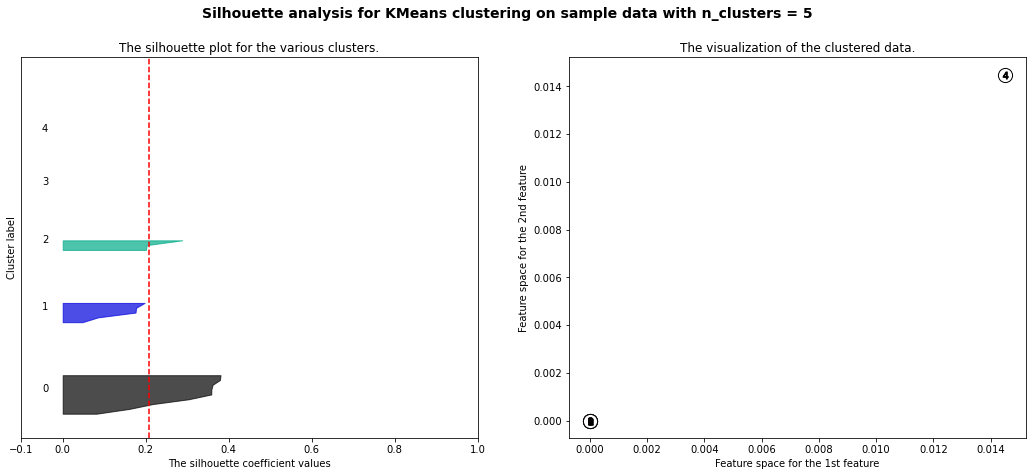

In [49]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Toronto_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Toronto_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Toronto_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Toronto_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Toronto_grouped_clustering.iloc[:, 0], Toronto_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [50]:
kclusters = 3

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2])

In [51]:

Toronto_merged = downtown_data

# add clustering labels
Toronto_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Toronto_merged.head()# check the last columns

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Café,Park,Thai Restaurant,Restaurant,Gastropub,Farmers Market,Hotel,Japanese Restaurant,Diner
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Café,Park,Japanese Restaurant,Pizza Place,Plaza,Restaurant,Gourmet Shop,Gastropub,Ramen Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Gastropub,Café,Japanese Restaurant,Theater,Cosmetics Shop,Restaurant,Gym,Hotel,Pizza Place
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Hotel,Farmers Market,Plaza,Pizza Place,Seafood Restaurant,Japanese Restaurant,Restaurant,Liquor Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Café,Park,Hotel,Plaza,Seafood Restaurant,Farmers Market,Restaurant,Concert Hall,Thai Restaurant


In [52]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Borough'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [53]:
map_clusters

### Clustering Neighbourhood

**Cluster1**

In [54]:
df1=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]
df1

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",0,Coffee Shop,Café,Park,Thai Restaurant,Restaurant,Gastropub,Farmers Market,Hotel,Japanese Restaurant,Diner
1,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Café,Park,Japanese Restaurant,Pizza Place,Plaza,Restaurant,Gourmet Shop,Gastropub,Ramen Restaurant
5,Central Bay Street,0,Café,Coffee Shop,Park,Restaurant,Pizza Place,Japanese Restaurant,Mexican Restaurant,Plaza,Ramen Restaurant,Hotel
6,Christie,0,Café,Coffee Shop,Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Park,Grocery Store,Mexican Restaurant,Cocktail Bar
8,"Harbourfront East, Union Station, Toronto Islands",0,Café,Coffee Shop,Hotel,Park,Japanese Restaurant,Gym,Theater,Scenic Lookout,Baseball Stadium,Deli / Bodega
11,"University of Toronto, Harbord",0,Café,Vegetarian / Vegan Restaurant,Bar,Coffee Shop,Beer Bar,Bakery,Grocery Store,Cocktail Bar,Restaurant,Comfort Food Restaurant
12,"Kensington Market, Chinatown, Grange Park",0,Café,Coffee Shop,Bar,Yoga Studio,Vegetarian / Vegan Restaurant,Dessert Shop,Bakery,Cocktail Bar,Pizza Place,Sandwich Place
14,Rosedale,0,Park,Italian Restaurant,Coffee Shop,Café,Sushi Restaurant,Indian Restaurant,Grocery Store,Gourmet Shop,French Restaurant,Spa
16,"St. James Town, Cabbagetown",0,Coffee Shop,Café,Park,Bakery,Japanese Restaurant,Thai Restaurant,Dance Studio,Pub,Gastropub,Ramen Restaurant
17,"First Canadian Place, Underground city",0,Coffee Shop,Café,Park,Plaza,Sandwich Place,Hotel,Pizza Place,Restaurant,Yoga Studio,Neighborhood


**Cluster2**

In [55]:
df2=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]
df2

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Garden District, Ryerson",1,Coffee Shop,Gastropub,Café,Japanese Restaurant,Theater,Cosmetics Shop,Restaurant,Gym,Hotel,Pizza Place
4,Berczy Park,1,Coffee Shop,Café,Park,Hotel,Plaza,Seafood Restaurant,Farmers Market,Restaurant,Concert Hall,Thai Restaurant
7,"Richmond, Adelaide, King",1,Coffee Shop,Café,Park,Yoga Studio,Plaza,Hotel,Sandwich Place,Japanese Restaurant,Restaurant,Neighborhood
10,"Commerce Court, Victoria Hotel",1,Coffee Shop,Café,Park,Plaza,Restaurant,Hotel,Yoga Studio,Farmers Market,Vegetarian / Vegan Restaurant,Neighborhood
13,"CN Tower, King and Spadina, Railway Lands, Har...",1,Park,Café,Coffee Shop,Gym,Harbor / Marina,Hotel,Sushi Restaurant,Brewery,Boat or Ferry,Track
15,Stn A PO Boxes,1,Coffee Shop,Café,Hotel,Park,Restaurant,Seafood Restaurant,Farmers Market,Plaza,Pizza Place,Neighborhood


**Cluster3**

In [56]:
df3=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]
df3

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,St. James Town,2,Coffee Shop,Café,Hotel,Farmers Market,Plaza,Pizza Place,Seafood Restaurant,Japanese Restaurant,Restaurant,Liquor Store
9,"Toronto Dominion Centre, Design Exchange",2,Coffee Shop,Café,Park,Plaza,Sandwich Place,Hotel,Pizza Place,Restaurant,Yoga Studio,Neighborhood
18,Church and Wellesley,2,Coffee Shop,Park,Café,Japanese Restaurant,Gastropub,Hotel,Indian Restaurant,Pizza Place,Diner,Dance Studio


In [57]:
clusters=pd.DataFrame({"cluster1":df1["Neighbourhood"],
                      "cluster2":df2["Neighbourhood"],
                      "cluster3":df3["Neighbourhood"]
                      })

### Veiwing Clusters

In [58]:
clusters = clusters.replace(np.nan, '', regex=True)

In [59]:
clusters

,cluster1,cluster2,cluster3
0,"Regent Park, Harbourfront",,
1,"Queen's Park, Ontario Provincial Government",,
2,,"Garden District, Ryerson",
3,,,St. James Town
4,,Berczy Park,
5,Central Bay Street,,
6,Christie,,
7,,"Richmond, Adelaide, King",
8,"Harbourfront East, Union Station, Toronto Islands",,
9,,,"Toronto Dominion Centre, Design Exchange"


In [60]:
new_Toronto=Toronto_merged.set_index("Neighbourhood",drop=True)
new_Toronto.head()

,Postal Code,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighbourhood,,,,,,,,,,,,,,,
"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,0,Coffee Shop,Café,Park,Thai Restaurant,Restaurant,Gastropub,Farmers Market,Hotel,Japanese Restaurant,Diner
"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,0,Coffee Shop,Café,Park,Japanese Restaurant,Pizza Place,Plaza,Restaurant,Gourmet Shop,Gastropub,Ramen Restaurant
"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,1,Coffee Shop,Gastropub,Café,Japanese Restaurant,Theater,Cosmetics Shop,Restaurant,Gym,Hotel,Pizza Place
St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,2,Coffee Shop,Café,Hotel,Farmers Market,Plaza,Pizza Place,Seafood Restaurant,Japanese Restaurant,Restaurant,Liquor Store
Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306,1,Coffee Shop,Café,Park,Hotel,Plaza,Seafood Restaurant,Farmers Market,Restaurant,Concert Hall,Thai Restaurant


In [61]:
new_Toronto_population=pd.DataFrame({
   
    "White":[65788,22334,21455,13443,13247,33445,12464,8764,7734,123344,67556,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705],
"Black":[8667, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474],
"Hispanic":[4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869],
 "Asian": [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748],
  "Hawaiian":[778,767,55,387,894,778,369,706,707, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125],  
"Indian":[1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288],

}
)
new_Toronto_population.head()

,White,Black,Hispanic,Asian,Hawaiian,Indian
0,65788,8667,4455,5666,778,1099
1,22334,547,1213,8977,767,988
2,21455,696,1667,3445,55,456
3,13443,1642,2544,6040,387,566
4,13247,407,5670,4279,894,223


In [62]:
new_Toronto_population["Neighbourhood"]=Toronto_merged["Neighbourhood"]

In [63]:
new_Toronto_population

,White,Black,Hispanic,Asian,Hawaiian,Indian,Neighbourhood
0,65788,8667,4455,5666,778,1099,"Regent Park, Harbourfront"
1,22334,547,1213,8977,767,988,"Queen's Park, Ontario Provincial Government"
2,21455,696,1667,3445,55,456,"Garden District, Ryerson"
3,13443,1642,2544,6040,387,566,St. James Town
4,13247,407,5670,4279,894,223,Berczy Park
5,33445,1360,4381,15539,778,618,Central Bay Street
6,12464,3552,2089,6140,369,397,Christie
7,8764,888,907,1465,706,285,"Richmond, Adelaide, King"
8,7734,888,888,1465,707,285,"Harbourfront East, Union Station, Toronto Islands"
9,123344,754,1212,2176,95,339,"Toronto Dominion Centre, Design Exchange"


In [64]:
new_Toronto_population.dropna(subset=["Neighbourhood"], inplace = True)
new_Toronto_population

,White,Black,Hispanic,Asian,Hawaiian,Indian,Neighbourhood
0,65788,8667,4455,5666,778,1099,"Regent Park, Harbourfront"
1,22334,547,1213,8977,767,988,"Queen's Park, Ontario Provincial Government"
2,21455,696,1667,3445,55,456,"Garden District, Ryerson"
3,13443,1642,2544,6040,387,566,St. James Town
4,13247,407,5670,4279,894,223,Berczy Park
5,33445,1360,4381,15539,778,618,Central Bay Street
6,12464,3552,2089,6140,369,397,Christie
7,8764,888,907,1465,706,285,"Richmond, Adelaide, King"
8,7734,888,888,1465,707,285,"Harbourfront East, Union Station, Toronto Islands"
9,123344,754,1212,2176,95,339,"Toronto Dominion Centre, Design Exchange"


In [65]:
!pip install plotly

In [66]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\wasee\anaconda3\lib\site-packages (4.14.3)


In [67]:
!pip install chart-studio
import chart_studio.plotly
import plotly 
import plotly.graph_objs as go


# Toronto Population distribution analysis

In [68]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly as py
 

chart_studio.tools.set_credentials_file(username='wasanjum', api_key='********************')

x = downtown_data["Neighbourhood"]

y1 =[65788,22334,21455,13443,13247,33445,12464,8764,7734,123344,67556,40141,40141,6638,6638,33597,33597,19093,17618,17618,21763,21763,20253,20253,14855,9447,26585,13040,17705]
y2 =[8667, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474]
y3= [4455,1213,1667,2544,5670, 4381,2089,907,888,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869]
y4= [5666,8977,3445,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748]
y5= [778,767,55,387,894,778,369,706,707, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125]
y6= [1099,988,456,566,223,618,397,285,285,339,783,783,783,453,453,636,636,440,317,317,417,417,408,408,924,309,912,657,288]


trace1 = go.Bar(
    x=x,
    y=y1,
    name="White",
    textposition = 'auto',
    marker=dict(
        color= "red",
        line=dict(
            color="red",
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    name="Black",
    textposition = 'auto',
    marker=dict(
        color='blue',
        line=dict(
            color='blue',
            width=1.5),
        ),
    opacity=0.6
)

trace3 = go.Bar(
    x=x,
    y=y3,
    name="Hispanic",
    textposition = 'auto',
    marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5),
        ),
    opacity=0.6
)

trace4 = go.Bar(
    x=x,
    y=y4,
    name="Asian",
    textposition = 'auto',
    marker=dict(
        color='yellow',
        line=dict(
            color='yellow',
            width=1.5),
        ),
    opacity=0.6
)

trace5 = go.Bar(
    x=x,
    y=y5,
    name="Hawaiian",
    textposition = 'auto',
    marker=dict(
        color='brown',
        line=dict(
            color='brown',
            width=1.5),
        ),
    opacity=0.6
)
trace6 = go.Bar(
    x=x,
    y=y6,
    name="Indian",
    textposition = 'auto',
    marker=dict(
        color='rgb(158,40,155)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2,trace3,trace4,trace5,trace6]
py.plot(data,kind = 'bar')
plt.show()

## Toronto School rating analysis

In [69]:
Toronto_school_ratings=pd.DataFrame({"Neighbourhood":downtown_data["Neighbourhood"],
        "Top School Rating":[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3]})

In [70]:
Toronto_school_ratings.set_index('Neighbourhood',inplace=True,drop=True)
Toronto_school_ratings.head()

,Top School Rating
Neighbourhood,
"Regent Park, Harbourfront",9
"Queen's Park, Ontario Provincial Government",7
"Garden District, Ryerson",8
St. James Town,8
Berczy Park,5


In [71]:

data = [go.Bar(
            x=downtown_data["Neighbourhood"],
            y=[9,7,8,8,5,6,7,9,4,4,4,10,7,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,2,
               6,7,8,8,5,6,7,9,4,3,4,10,7,4,2,8,6,9,3,6,3,5,5,9,8,4,2,6,7,10,
               10,7,8,6,5,6,7,9,4,4,4,1,7,4,4,5,6,4,3,6,10,5,7,8,4,9,3,3,2,8,
               8,7,8,2,5,6,7,9,4,4,6,3,7,4,9,5,6,8,3,6,10,5,7,9,4,1,4,3,8,2,
               3,7,8,5,5,6,7,9,8,4,4,8,2,1,4,5,6,2,3,6,6,5,3,2,4,2,2,3,7,8,
               2,7,8,8,5,6,7,9,4,9,4,3,7,8,4,5,6,7,3,6,4,5,5,9,4,4,8,3,9,5,
               1,7,8,8,5,6,7,9,2,4,9,6,7,6,4,5,6,8,3,6,7,5,6,7,4,2,5,3,4,2,
               8,3,8,6,5,6,7,3,4,4,7,2,7,4,8,5,6,4,3,6,10,5,5,9,4,9,8,3,2,3,
               6,4,5,9,5,7],
     marker=dict(
        color='rgb(158,120,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]
py.plot(data, kind='bar')
plt.show()

## Toronto Neighbourhood Average House Pricing Analysis

In [72]:
Toronto_Avg_HousingPrice=pd.DataFrame({"Neighbourhood":downtown_data["Neighbourhood"],
                                      "Average_Housing_Price":[472050.0,543500.0,497860.0,502000.0,
                                                               479200.0,425740.0,325800.0,373570.0,370507.0,
                                                               555400.0,236540.0,633500.0,335060.0,
                                                               535408.0,486600.0,586600.0,487300.0,575700.0,
                                                               325900.0
                                                               ]})

In [73]:
Toronto_Avg_HousingPrice.set_index('Neighbourhood',inplace=True,drop=True)

In [74]:

data = [go.Bar(
            x=downtown_data["Neighbourhood"],
            y=[172050.0,343500.0,297860.0,202000.0,279200.0,225740.0,225800.0,373570.0,370507.0,255400.0,436540.0,433500.0,335060.0,335408.0,286600.0,286600.0,187300.0,175700.0,225900.0,239440.0,363400.0,433700.0,233580.0,335200.0,335070.0,286620.0,286690.0,433600.0,233580.0,355060.0,335540.0,286500.0,286650.0,433580.0,433509.0,339005.0,335700.0,286606.0,586670.0,833590.0,433507.0,335080.0,375096.0,286600.0,286604.0,433501.0,433800.0,335009.0,335600.0,286680.0,286100.0,432500.0,433700.0,335030.0,335200.0,283600.0,486600.0,533560.0,434500.0,335090.0,333000.0,286630.0,286600.0,433200.0,333100.0,335040.0,339000.0,286300.0,286600.0,431500.0,433200.0,335000.0,335300.0,286200.0,286600.0,432500.0,439500.0,335900.0,335100.0,286600.0,286600.0,433500.0,433500.0,335000.0,335200.0,286200.0,286100.0,372050.0,343500.0,291900.0,202000.0,279200.0,225000.0,225090.0,370500.0,390200.0,255200.0,437500.0,533300.0,335000.0,335600.0,286600.0,286900.0,187730.0,175030.0,225900.0,219490.0,363700.0,483500.0,433020.0,335080.0,335000.0,286600.0,286100.0,433870.0,434364.0,335000.0,365750.0,286600.0,286568.0,433500.0,433974.0,335000.0,335070.0,286600.0,286770.0,433500.0,433220.0,335560.0,335450.0,282340.0,118660.0,433500.0,436680.0,337670.0,335000.0,286780.0,286680.0,433500.0,433550.0,335095.0,335540.0,286606.0,286765.0,433500.0,433544.0,335677.0,335744.0,286440.0,286550.0,433500.0,435650.0,335450.0,335040.0,286650.0,286600.0,433600.0,433300.0,335800.0,365000.0,233600.0,286600.0,434400.0,438600.0,335790.0,335000.0,282450.0,286550.0,433330.0,433500.0,335550.0,335000.0,286450.0,286600.0,172450.0,343500.0,233900.0,206600.0,279200.0,225600.0,225000.0,370500.0,370500.0,255400.0,435600.0,433700.0,335000.0,335700.0,286600.0,286600.0,187300.0,175000.0,225900.0,219400.0,363400.0,433500.0,436600.0,335000.0,336000.0,286600.0,284550.0,433500.0,433560.0,335000.0,335000.0,286700.0,286600.0,436670.0,433500.0,335560.0,335000.0,284550.0,286600.0,235660.0,433580.0,335560.0,337880.0,286600.0,286790.0,433500.0,433990.0,335000.0,335000.0,286600.0,286770.0,433500.0,433500.0,335000.0,335000.0,286600.0,286600.0,433500.0,433500.0,335000.0,335000.0,286990.0,286600.0,433800.0,433800.0,335000.0,335800.0,
               286600.0,286600.0,434770.0,335000.0,286600.0               
            ],
     marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5,
        )
    ),
    opacity=0.6
    )]
py.plot(data, kind='bar')
plt.show()

In [75]:
new_Toronto_population["Neighbourhood"]=Toronto_merged["Neighbourhood"]
new_Toronto_population1=new_Toronto_population.set_index("Neighbourhood")
new_Toronto_population1

,White,Black,Hispanic,Asian,Hawaiian,Indian
Neighbourhood,,,,,,
"Regent Park, Harbourfront",65788,8667,4455,5666,778,1099
"Queen's Park, Ontario Provincial Government",22334,547,1213,8977,767,988
"Garden District, Ryerson",21455,696,1667,3445,55,456
St. James Town,13443,1642,2544,6040,387,566
Berczy Park,13247,407,5670,4279,894,223
Central Bay Street,33445,1360,4381,15539,778,618
Christie,12464,3552,2089,6140,369,397
"Richmond, Adelaide, King",8764,888,907,1465,706,285
"Harbourfront East, Union Station, Toronto Islands",7734,888,888,1465,707,285



**Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below, any neighbourhood can be analysis from given above the list**

- More Indian Population
- Higher School Rating
- Reasonable Housing Price in the Range of 300k to 500k
- Comfortable Neighborhoods

In [76]:
Nei1=input("Enter the Neighbourhood:")

Enter the Neighbourhood:Richmond, Adelaide, King


In [77]:
Nei2=input("Enter the Neighbourhood:")

Enter the Neighbourhood:Regent Park, Harbourfront


In [78]:
Venue_comparison=new_Toronto.loc[[Nei1,Nei2]].T
Venue_comparison

Neighbourhood,"Richmond, Adelaide, King","Regent Park, Harbourfront"
Postal Code,M5H,M5A
Borough,Downtown Toronto,Downtown Toronto
Latitude,43.6506,43.6543
Longitude,-79.3846,-79.3606
Cluster Labels,1,0
1st Most Common Venue,Coffee Shop,Coffee Shop
2nd Most Common Venue,Café,Café
3rd Most Common Venue,Park,Park
4th Most Common Venue,Yoga Studio,Thai Restaurant
5th Most Common Venue,Plaza,Restaurant


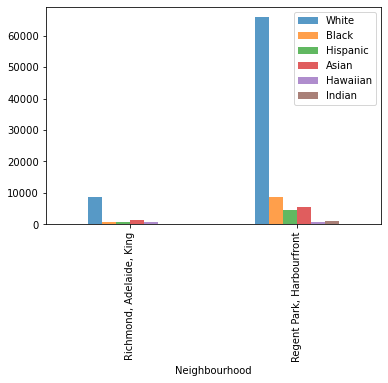

In [79]:
Population_Comparison=new_Toronto_population1.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)
plt.show()

In [80]:
#print(new_Toronto_population1.index.tolist())

#print(Toronto_school_ratings.index.tolist())

In [81]:
Population_Comparison['Indian']

Neighbourhood
Richmond, Adelaide, King      285
Regent Park, Harbourfront    1099
Name: Indian, dtype: int64

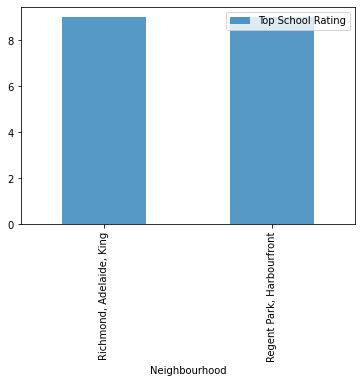

In [82]:
School_rating_comparison=Toronto_school_ratings.loc[[Nei1,Nei2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);
plt.show()

In [83]:
School_rating_comparison


,Top School Rating
Neighbourhood,
"Richmond, Adelaide, King",9
"Regent Park, Harbourfront",9


In [84]:
Avg_housing_price_comparison= Toronto_Avg_HousingPrice.loc[[Nei1,Nei2]]
Avg_housing_price_comparison

,Average_Housing_Price
Neighbourhood,
"Richmond, Adelaide, King",373570.0
"Regent Park, Harbourfront",472050.0


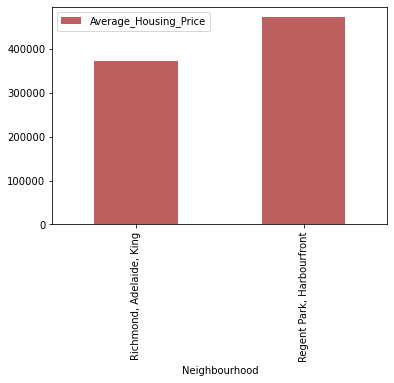

In [85]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='brown');
plt.show()

## Conclusion:

This Analysis concludes that the two places of Toronto Neighbourhood, Parview both has great amenities and locality, but out of these two Parview has better prospects for buying houses or choose for rental houses.Parview has the higher number of Indian population ,good school rating of 9 and a reasonable avg housing price of around 225k ,also top 10 common venues shows Parview has got a good neighborhood with Gas station, Italian and American Restautrant,Train Station,Clothing Store , Park, Donot Shop and many more. Hence Parview wins over Armour Square!

This study helps user to compare two neighborhood and recommend options with facts.

`Note: the average house pricing are base on old data however current prices can be obtained by giving current housing data`